In [188]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image




%matplotlib inline

In [189]:
img1 = Image.open("grayscale1.jpeg")

img2 = Image.open("grayscale2.jpeg")
#grayscale_image2 = img2.convert("L")
img3 = Image.open("binary1.jpeg")
#binary_image1 = img3.convert("L")
img1_array = np.array(img1)
img2_array = np.array(img2)



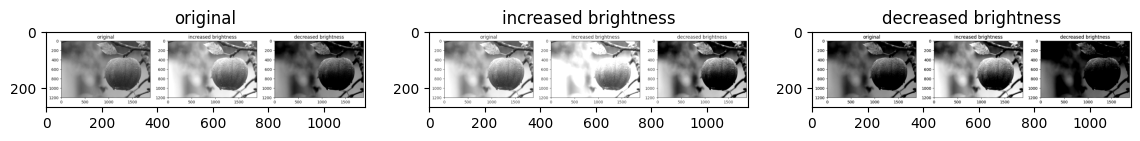

In [190]:
#preprocessing
grayscale_image1 = img1.convert("L")
grayscale1_array = np.array(grayscale_image1)
#increase brightness
brightness = 70
grayscale1_increasedbrightness=cv2.addWeighted(grayscale1_array, 1, np.zeros(grayscale1_array.shape, grayscale1_array.dtype), 0, brightness)
#decrease brightness
brightness = -70
grayscale1_decreasedbrightness=cv2.addWeighted(grayscale1_array, 1, np.zeros(grayscale1_array.shape, grayscale1_array.dtype), 0, brightness)

#figure
fig, ((ax1, ax2,ax3)) = plt.subplots(1, 3, figsize=(14,7))


ax1.set_title('original')
ax1.imshow(grayscale1_array, cmap='gray')
ax2.set_title('increased brightness')
ax2.imshow(grayscale1_increasedbrightness, cmap='gray')
ax3.set_title('decreased brightness')
ax3.imshow(grayscale1_decreasedbrightness, cmap='gray')

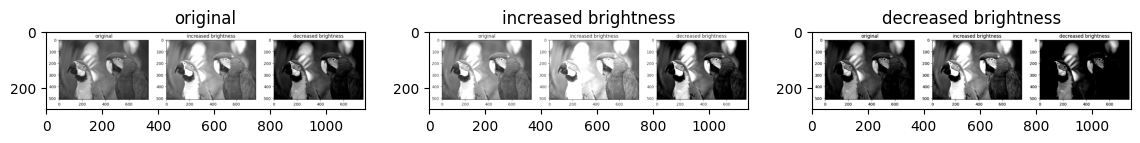

In [191]:
#preprocessing
grayscale_image2 = img2.convert("L")
grayscale1_array2 = np.array(grayscale_image2)
#increase brightness
brightness = 70
grayscale2_increasedbrightness=cv2.addWeighted(grayscale1_array2, 1, np.zeros(grayscale1_array2.shape, grayscale1_array2.dtype), 0, brightness)
#decrease brightness
brightness = -70
grayscale2_decreasedbrightness=cv2.addWeighted(grayscale1_array2, 1, np.zeros(grayscale1_array2.shape, grayscale1_array2.dtype), 0, brightness)

#figure
fig, ((ax1, ax2,ax3)) = plt.subplots(1, 3, figsize=(14,7))


ax1.set_title('original')
ax1.imshow(grayscale1_array2, cmap='gray')
ax2.set_title('increased brightness')
ax2.imshow(grayscale2_increasedbrightness, cmap='gray')
ax3.set_title('decreased brightness')
ax3.imshow(grayscale2_decreasedbrightness, cmap='gray')

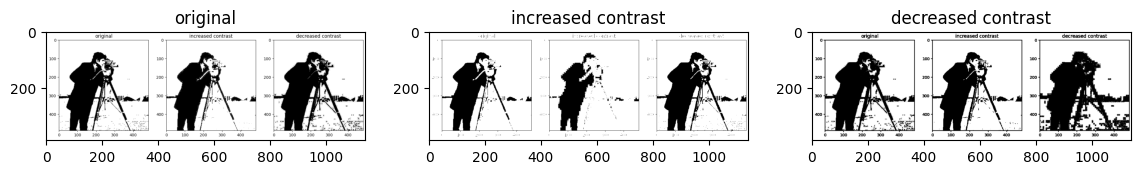

In [192]:
#preprocessing
binary_image1 = img3.convert("L")
binary_array1 = np.array(binary_image1)
#increase contrast
contrast = 50
binary1_increasedcontrast=cv2.addWeighted(binary_array1, contrast, np.zeros(binary_array1.shape, binary_array1.dtype), 0, brightness)
#decrease contrast
contrast = 0.3
binary1_decreasedcontrast=cv2.addWeighted(binary_array1, contrast, np.zeros(binary_array1.shape, binary_array1.dtype), 0, brightness)

#figure
fig, ((ax1, ax2,ax3)) = plt.subplots(1, 3, figsize=(14,7))


ax1.set_title('original')
ax1.imshow(binary_array1, cmap='gray')
ax2.set_title('increased contrast')
ax2.imshow(binary1_increasedcontrast, cmap='gray')
ax3.set_title('decreased contrast')
ax3.imshow(binary1_decreasedcontrast, cmap='gray')

In [193]:
# 1. Mean Squared Error (MSE)
def mean_squared_error(image1, image2):
    squared_diff = (image1 - image2) ** 2
    mse = np.mean(squared_diff)
    return mse

# 2. Structural Similarity Index (SSIM)
def structural_similarity_index(image1, image2):
    mu1 = np.mean(image1)
    mu2 = np.mean(image2)
    sigma1 = np.std(image1)
    sigma2 = np.std(image2)

    c1 = (0.01 * 255) ** 2
    c2 = (0.03 * 255) ** 2

    covariance = np.cov(image1.flatten(), image2.flatten())[0, 1]

    luminance = (2 * mu1 * mu2 + c1) / (mu1 ** 2 + mu2 ** 2 + c1)
    contrast = (2 * sigma1 * sigma2 + c2) / (sigma1 ** 2 + sigma2 ** 2 + c2)
    structure = (covariance + c2 / 2) / (sigma1 * sigma2 + c2 / 2)

    ssim = luminance * contrast * structure
    return ssim

# 3. Peak Signal-to-Noise Ratio (PSNR)
def peak_signal_to_noise_ratio(image1, image2, max_pixel_value=255):
    mse = mean_squared_error(image1, image2)
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr

# 4. Histogram Intersection
def histogram_intersection(image1, image2):
    hist1, _ = np.histogram(image1.flatten(), bins=256, range=[0,256])
    hist2, _ = np.histogram(image2.flatten(), bins=256, range=[0,256])
    intersection = np.minimum(hist1, hist2)
    return np.sum(intersection)


In [194]:
from PIL import Image

# Load the images
img1 = Image.open("grayscale1.jpeg")
img2 = Image.open("grayscale2.jpeg")

# Resize images to the same dimensions
img1 = img1.resize((img2.width, img2.height))

# Convert images to NumPy arrays
grayscale_array1 = np.array(img1.convert("L"))
grayscale_array2 = np.array(img2.convert("L"))

# Preprocessing (if necessary)
# Assuming preprocessing is already done in your code

# Test scenarios
mse_result = mean_squared_error(grayscale_array1, grayscale_array2)
ssim_result = structural_similarity_index(grayscale_array1, grayscale_array2)
psnr_result = peak_signal_to_noise_ratio(grayscale_array1, grayscale_array2)
hist_intersection_result = histogram_intersection(grayscale_array1, grayscale_array2)

# Display results
print("Mean Squared Error:", mse_result)
print("Structural Similarity Index:", ssim_result)
print("Peak Signal-to-Noise Ratio:", psnr_result)
print("Histogram Intersection:", hist_intersection_result)


Mean Squared Error: 73.44104313394158
Structural Similarity Index: 0.6410563650911331
Peak Signal-to-Noise Ratio: 29.47141524045947
Histogram Intersection: 261440


In [195]:
# Load the images
img1 = Image.open("grayscale1.jpeg")
img2 = Image.open("grayscale2.jpeg")
img3 = Image.open("binary1.jpeg")

# Convert images to NumPy arrays
grayscale_array1 = np.array(img1.convert("L"))
grayscale_array2 = np.array(img2.convert("L"))
binary_array1 = np.array(img3.convert("L"))

# Preprocessing (if necessary)
# Assuming preprocessing is already done in your code

# Test scenarios for grayscale images
print("Comparative functions for grayscale images:")
print("--------------------------------------------")
# Original vs. preprocessed (increased brightness) for grayscale image 1
print("Original vs. preprocessed (increased brightness) for grayscale image 1:")
print("Mean Squared Error:", mean_squared_error(grayscale_array1, grayscale1_increasedbrightness))
print("Structural Similarity Index:", structural_similarity_index(grayscale_array1, grayscale1_increasedbrightness))
print("Peak Signal-to-Noise Ratio:", peak_signal_to_noise_ratio(grayscale_array1, grayscale1_increasedbrightness))
# Original vs. preprocessed (decreased brightness) for grayscale image 1
print("\nOriginal vs. preprocessed (decreased brightness) for grayscale image 1:")
print("Mean Squared Error:", mean_squared_error(grayscale_array1, grayscale1_decreasedbrightness))
print("Structural Similarity Index:", structural_similarity_index(grayscale_array1, grayscale1_decreasedbrightness))
print("Peak Signal-to-Noise Ratio:", peak_signal_to_noise_ratio(grayscale_array1, grayscale1_decreasedbrightness))
# Original vs. preprocessed (increased brightness) for grayscale image 2
print("\nOriginal vs. preprocessed (increased brightness) for grayscale image 2:")
print("Mean Squared Error:", mean_squared_error(grayscale_array2, grayscale2_increasedbrightness))
print("Structural Similarity Index:", structural_similarity_index(grayscale_array2, grayscale2_increasedbrightness))
print("Peak Signal-to-Noise Ratio:", peak_signal_to_noise_ratio(grayscale_array2, grayscale2_increasedbrightness))
# Original vs. preprocessed (decreased brightness) for grayscale image 2
print("\nOriginal vs. preprocessed (decreased brightness) for grayscale image 2:")
print("Mean Squared Error:", mean_squared_error(grayscale_array2, grayscale2_decreasedbrightness))
print("Structural Similarity Index:", structural_similarity_index(grayscale_array2, grayscale2_decreasedbrightness))
print("Peak Signal-to-Noise Ratio:", peak_signal_to_noise_ratio(grayscale_array2, grayscale2_decreasedbrightness))

# Test scenarios for binary image
print("\nComparative functions for binary image:")
print("----------------------------------------")
# Original vs. preprocessed (increased contrast) for binary image
print("Original vs. preprocessed (increased contrast) for binary image:")
print("Histogram Intersection:", histogram_intersection(binary_array1, binary1_increasedcontrast))
# Original vs. preprocessed (decreased contrast) for binary image
print("\nOriginal vs. preprocessed (decreased contrast) for binary image:")
print("Histogram Intersection:", histogram_intersection(binary_array1, binary1_decreasedcontrast))


Comparative functions for grayscale images:
--------------------------------------------
Original vs. preprocessed (increased brightness) for grayscale image 1:
Mean Squared Error: 31.392254134029592
Structural Similarity Index: 0.8716679996005519
Peak Signal-to-Noise Ratio: 33.16257859350014

Original vs. preprocessed (decreased brightness) for grayscale image 1:
Mean Squared Error: 41.32707023821036
Structural Similarity Index: 0.8690822939616015
Peak Signal-to-Noise Ratio: 31.968457425322043

Original vs. preprocessed (increased brightness) for grayscale image 2:
Mean Squared Error: 29.027928927672935
Structural Similarity Index: 0.8833569818890254
Peak Signal-to-Noise Ratio: 33.502643097888885

Original vs. preprocessed (decreased brightness) for grayscale image 2:
Mean Squared Error: 45.37273248885554
Structural Similarity Index: 0.8561475416330371
Peak Signal-to-Noise Ratio: 31.562854262327612

Comparative functions for binary image:
----------------------------------------
Origi

In [196]:
# Intersection over Union
def iou(image1, image2):
    intersection = 0
    union = 0
    min_height = min(len(image1), len(image2))
    min_width = min(len(image1[0]), len(image2[0]))

    for i in range(min_height):
        for j in range(min_width):
            if image1[i][j] == 1 and image2[i][j] == 1:
                intersection += 1
            if image1[i][j] == 1 or image2[i][j] == 1:
                union += 1
    return intersection / union if union != 0 else 0


# Dice Coefficient
def dice_coefficient(image1, image2):
    intersection = 0
    total1 = 0
    total2 = 0
    min_height = min(len(image1), len(image2))
    min_width = min(len(image1[0]), len(image2[0]))

    for i in range(min_height):
        for j in range(min_width):
            if image1[i][j] == 1:
                total1 += 1
            if image2[i][j] == 1:
                total2 += 1
            if image1[i][j] == 1 and image2[i][j] == 1:
                intersection += 1
    return (2 * intersection) / (total1 + total2) if (total1 + total2) != 0 else 0


# Hausdorff Distance
def hausdorff_distance(image1, image2):
    def find_max_min_distance(points1, points2):
        max_dist = 0
        for x1, y1 in points1:
            min_dist = float('inf')
            for x2, y2 in points2:
                dist = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
                if dist < min_dist:
                    min_dist = dist
            if min_dist > max_dist:
                max_dist = min_dist
        return max_dist

    points1 = [(i, j) for i, row in enumerate(image1) for j, value in enumerate(row) if value == 1]
    points2 = [(i, j) for i, row in enumerate(image2) for j, value in enumerate(row) if value == 1]

    min_height = min(len(image1), len(image2))
    min_width = min(len(image1[0]), len(image2[0]))

    hausdorff1 = find_max_min_distance(points1, points2)
    hausdorff2 = find_max_min_distance(points2, points1)
    return max(hausdorff1, hausdorff2)


# Usage example:
# Assuming `img1` and `img2` are numpy arrays of the same shape with binary values (0 and 1).
iou_score = iou(grayscale_array1, grayscale_array2)
dice_score = dice_coefficient(binary1_decreasedcontrast, binary1_increasedcontrast)
hausdorff_score = hausdorff_distance(grayscale1_array2, grayscale1_array)

print(iou_score)
print(dice_score)
print(hausdorff_score)

0.007945516458569807
0.0
78.23042886243178


In [197]:
#Helper Functions
def calculate_mean(array):
    total = 0
    for row in array:
        total += sum(row)
    return total / (len(array) * len(array[0]))

def calculate_covariance(image1, image2, mean_image1, mean_image2):
    total = 0
    for i in range(len(image1)):
        for j in range(len(image1[0])):
            total += (image1[i][j] - mean_image1) * (image2[i][j] - mean_image2)
    return total / (len(image1) * len(image1[0]))  # Adjusted this line

def calculate_variance(image, mean_image):
    total = 0
    for i in range(len(image)):
        for j in range(len(image[0])):
            total += (image[i][j] - mean_image) ** 2
    return total / (len(image) * len(image[0]))

def calculate_squared_difference(image1, image2):
    total = 0
    for i in range(len(image1)):
        for j in range(len(image1[i])):
            diff = image1[i][j] - image2[i][j]
            total += diff * diff
    return total


def calculate_rmsd(squared_diff, num_pixels):
    rmsd = (squared_diff / num_pixels) ** 0.5
    return rmsd


In [198]:
#Pearson Correlation
def pearson_correlation(image1, image2):
    mean_image1 = calculate_mean(image1)
    mean_image2 = calculate_mean(image2)
    covariance = calculate_covariance(image1, image2, mean_image1, mean_image2)
    std_image1 = calculate_variance(image1, mean_image1) ** 0.5
    std_image2 = calculate_variance(image2, mean_image2) ** 0.5

    if std_image1 == 0 or std_image2 == 0:
        return 0
    else:
        pearson_corr = covariance / (std_image1 * std_image2)
        return pearson_corr

pearson_corr_coeff = pearson_correlation(grayscale1_array, grayscale1_increasedbrightness)
print(pearson_corr_coeff)

0.9567790723593764


In [199]:
#RMSD
def root_mean_squared_difference(image1, image2):
    squared_diff = calculate_squared_difference(image1, image2)
    n_pixels = len(image1) * len(image1[0])
    rmsd = calculate_rmsd(squared_diff, n_pixels)

    return rmsd
rmsd_value = root_mean_squared_difference(grayscale1_array, grayscale1_decreasedbrightness)
print(rmsd_value)

<ipython-input-197-e3a2c4ce712a>:27: RuntimeWarning: overflow encountered in scalar multiply
  total += diff * diff


6.4286133993428445


In [200]:
#SSIM
def structural_similarity_index(image1, image2, c1=0.065, c2=0.065):
    mean_image1 = calculate_mean(image1)
    mean_image2 = calculate_mean(image2)
    cov_image1_image2 = calculate_covariance(image1, image2, mean_image1, mean_image2)
    var_image1 = calculate_variance(image1, mean_image1)
    var_image2 = calculate_variance(image2, mean_image2)
    numerator = (2 * mean_image1 * mean_image2 + c1) * (2 * cov_image1_image2 + c2)
    denominator = (mean_image1 ** 2 + mean_image2 ** 2 + c1) * (var_image1 + var_image2 + c2)
    ssim = numerator / denominator
    return ssim
ssim_value = structural_similarity_index(binary1_increasedcontrast, binary1_decreasedcontrast)
print("Structural Similarity Index Measure (SSIM):", ssim_value)

Structural Similarity Index Measure (SSIM): 0.0023611018198843496


In [201]:
#Quality Index - Comparator 1 from paper "A Review of Quality Metrics for Fused Image"
def quality_index(image1, image2):
    mean_image1 = calculate_mean(image1)
    mean_image2 = calculate_mean(image2)
    var_image1 = calculate_variance(image1, mean_image1)
    var_image2 = calculate_variance(image2, mean_image2)
    cov_image1_image2 = calculate_covariance(image1, image2, mean_image1, mean_image2)
    numerator = 4 * cov_image1_image2
    denominator = (var_image1 + var_image2) * (mean_image1 ** 2 + mean_image2 ** 2)
    if denominator != 0:
        qi = numerator / denominator
    else:
        qi = 0

    return qi


qi_value = quality_index(grayscale2_increasedbrightness, grayscale2_decreasedbrightness)
print(qi_value)

3.917314699195112e-05


In [202]:
#Cross Correlation - Comparator 2 from paper "A Review of Quality Metrics for Fused Image"
def cross_correlation(reference_image, fused_image):
    reference_array = np.array(reference_image)
    fused_array = np.array(fused_image)
    mean_reference = calculate_mean(reference_array)
    mean_fused = calculate_mean(fused_array)
    total_rf = 0
    for i in range(len(reference_array)):
        for j in range(len(reference_array[0])):
            total_rf += (reference_array[i][j] - mean_reference) * (fused_array[i][j] - mean_fused)

    total_r = 0
    for i in range(len(reference_array)):
        for j in range(len(reference_array[0])):
            total_r += (reference_array[i][j] - mean_reference) ** 2

    total_f = 0
    for i in range(len(fused_array)):
        for j in range(len(fused_array[0])):
            total_f += (fused_array[i][j] - mean_fused) ** 2

    corr_coefficient = (2 * total_rf) / (total_r + total_f)
    return corr_coefficient


cc_value = cross_correlation(grayscale2_increasedbrightness, grayscale2_decreasedbrightness)
print(cc_value)


0.9017937117276252
